#  Learning Pytorch

## 0. PyTorch basics
- basic operations
- Linear Regression with sample dataset

## 1. Preparation
- Download the pickle gzipped mnist dataset
- Reshape to image and look at the data

## 2. Logistic Regression
- define a logistic regression model with MSE as loss metric and SGD as an optimizer
- run a train-test loop, evaluate the accuracy

## 3. Neural Network
- define a neural network with multiple hidden layers to improve the performance over Logistic Regression

## 4. CNN
- TBD

## 5. RNN
- TBD
Sources: 
- https://github.com/fastai/fastai/blob/master/courses/ml1/lesson4-mnist_sgd.ipynb
- https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers

In [464]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 0. PyTorch basics
- `.Tensor()` converts to pytorch's tensor
- `.from_numpy()` and `.numpy()` for conversion
- `.view()` for reshaping
- `Variable` from `.autograd` package - var with history, accumulates gradients

### Simple car sells - car prices linear regression

In [465]:
from ml_helpers.scraping import *
from ml_helpers.pytorch import *
from sklearn.model_selection import train_test_split
import torch

In [466]:
car_prices = [3,4,5,6,7,8,9]
car_sell = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
car_prices_reshaped = np.array(car_prices, dtype=np.float).reshape(-1,1)
car_sell_reshaped = np.array(car_sell, dtype=np.float).reshape(-1,1)
car_prices_tensor = Variable(torch.from_numpy(car_prices_reshaped))
car_sell_tensor = Variable(torch.from_numpy(car_sell_reshaped))

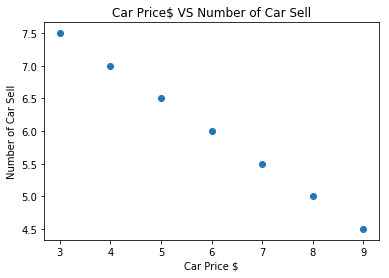

In [467]:
import matplotlib.pyplot as plt
plt.scatter(car_prices,car_sell)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

### Building a Torch model
1. Define a class containing at least `__init__` and `forward()` functions representing the model inheriting from `nn.Module`
2. in `__init__` define layers from `nn` that'll be used in the model

### Using a Torch model
- instantiate the model
- define a loss metric
- define an optimizer
- create a training loop

Epoch: 500, loss: 10.784916971917141
Epoch: 500, loss: 5.22842851011311
Epoch: 500, loss: 3.533068338538453
Epoch: 500, loss: 2.3874423950979535
Epoch: 500, loss: 1.61329491641505
Epoch: 500, loss: 1.090171010062782
Epoch: 500, loss: 0.7366742553322146
Epoch: 500, loss: 0.49780167832386296
Epoch: 500, loss: 0.33638546365422073
Epoch: 500, loss: 0.22730976026209274
Epoch: 500, loss: 0.1536027346399332


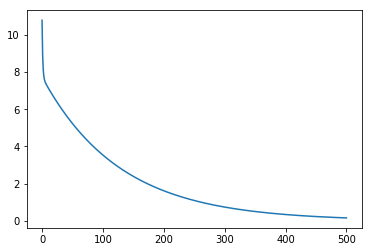

In [468]:
from torch.autograd import Variable     
import torch.nn as nn

class LinearRegression(nn.Module):
    def __init__(self, in_size, out_size):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(in_size, out_size)
    
    def forward(self, x):
        return self.linear(x)

model = LinearRegression(1, 1)
model = model.double()
loss = nn.MSELoss()
opt = torch.optim.SGD(model.parameters(), lr=0.02)
losses = []
n_epochs = 501
for ep in range(n_epochs):
    opt.zero_grad()
    y_pred = model(car_prices_tensor)
    l = loss(y_pred, car_sell_tensor)
    l.backward()
    opt.step()
    losses.append(l.data)
    if ep % 50 == 0:
        print(f"Epoch: {it}, loss: {l.data}")

plt.plot(range(n_epochs), losses)
plt.show()

## 1. Preparation
- Download the pickle gzipped mnist dataset
- Reshape to image and look at the data

In [469]:
URL='http://deeplearning.net/data/mnist/'
FILENAME='mnist.pkl.gz'
path = 'data/mnist/'
download_dataset(URL+FILENAME, path+FILENAME)
((x, y), (x_valid, y_valid), _) = load_pickle(open_gzip(path+FILENAME))

In [470]:
batch_size = 100

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2, random_state=42)
x_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(Y_train).type(torch.LongTensor)
x_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(Y_test).type(torch.LongTensor)

n_iters = 10000
num_epochs = n_iters / (len(X_train) / batch_size)
num_epochs = int(num_epochs)

train = torch.utils.data.TensorDataset(x_train, y_train)
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test = torch.utils.data.TensorDataset(x_test, y_test)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

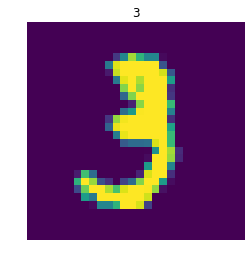

In [471]:
plt.imshow(x[10].reshape(28,28))
plt.axis("off")
plt.title(str(y[10]))
plt.show()

Dataset loading
- inherit from utils.data.Dataset
Source: https://pytorch.org/tutorials/beginner/data_loading_tutorial.html


Text(0.5, 1.0, '3')

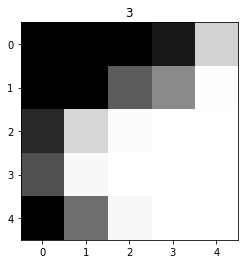

In [472]:
plt.imshow(x[10].reshape(28,28)[10:15, 10:15], cmap="gray")
plt.title(str(y[10]))

## 2. Logistic Regression
- define a logistic regression model with MSE as loss metric and SGD as an optimizer
- run a train-test loop, evaluate model's performance

In [473]:
class LogReg(nn.Module):
    def __init__(self, in_size, out_size):
        super(LogReg, self).__init__()
        self.linear = nn.Linear(in_size, out_size)

    def forward(self, x):
        out = self.linear(x)
        return out

net = LogReg(28*28, 10)
error=nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer=torch.optim.SGD(net.parameters(), lr=learning_rate)

In [474]:
def train_test_loop(model, n_epochs, train_loader, test_loader):
    train_losses = []
    test_losses = []
    accuracies = []
    for ep in range(n_epochs):
        for i, (data, label) in enumerate(train_loader):
            optimizer.zero_grad()
            y_pred = model(Variable(data.view(-1, 28*28)))
            train_loss = error(y_pred, Variable(label))
            if i%1000 == 0:
                train_losses.append(train_loss.data)
            train_loss.backward()
            optimizer.step()
            
            if i%1000 == 0:
                for j, (data, label) in enumerate(test_loader):
                    y_test_pred = model(Variable(data.view(-1, 28*28)))
                    predicted = torch.max(y_test_pred.data, 1)[1]
                    test_loss = error(y_test_pred, Variable(label))
                    if j%1000 == 0:
                        test_losses.append(test_loss.data)
                        accuracies.append((predicted == label).numpy().mean())
                print('Epoch: {} Training Loss: {} Testing loss: {}  Accuracy: {}%'.format(ep, train_loss.data, test_loss.data, accuracies[-1]))

    return train_losses, test_losses, accuracies

%time train_losses, test_losses, accuracies = train_test_loop(net, 20, train_loader, test_loader)

Epoch: 0 Training Loss: 2.2991020679473877 Testing loss: 2.303285598754883  Accuracy: 0.16%
Epoch: 1 Training Loss: 1.9474633932113647 Testing loss: 1.9161475896835327  Accuracy: 0.68%
Epoch: 2 Training Loss: 1.690283179283142 Testing loss: 1.6350096464157104  Accuracy: 0.73%
Epoch: 3 Training Loss: 1.498885989189148 Testing loss: 1.4256271123886108  Accuracy: 0.73%
Epoch: 4 Training Loss: 1.3550158739089966 Testing loss: 1.2684024572372437  Accuracy: 0.75%
Epoch: 5 Training Loss: 1.2444779872894287 Testing loss: 1.148242473602295  Accuracy: 0.78%
Epoch: 6 Training Loss: 1.1574195623397827 Testing loss: 1.0543828010559082  Accuracy: 0.81%
Epoch: 7 Training Loss: 1.0872372388839722 Testing loss: 0.9794471263885498  Accuracy: 0.82%
Epoch: 8 Training Loss: 1.029482364654541 Testing loss: 0.9184052348136902  Accuracy: 0.82%
Epoch: 9 Training Loss: 0.9811011552810669 Testing loss: 0.8677875399589539  Accuracy: 0.84%
Epoch: 10 Training Loss: 0.9399465322494507 Testing loss: 0.825155854225158

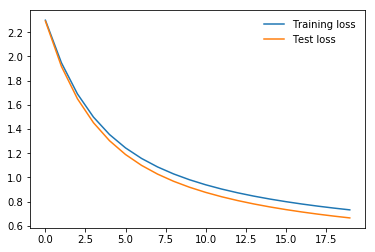

In [475]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Test loss')
plt.legend(frameon=False)

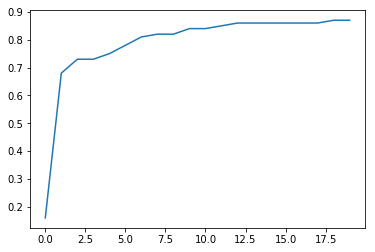

In [476]:
plt.plot(accuracies, label='Accuracies')

The model doesn't really improve over ~88\%, but we can do better with a Neural Network.


## 3. Neural Network
- define a neural network with multiple hidden layers to improve the performance over Logistic Regression

In [477]:
class ANN(nn.Module):
    def __init__(self, in_size, hid_size, out_size):
        super(ANN, self).__init__()
        self.lin1 = nn.Linear(in_size, hid_size)
        self.act1 = nn.ReLU()
        self.lin2 = nn.Linear(hid_size, hid_size)
        self.act2 = nn.Tanh()
        self.lin3 = nn.Linear(hid_size, hid_size)
        self.act3 = nn.ELU()
        self.lin4 = nn.Linear(hid_size, out_size)
        
    def forward(self, x):
        out = self.lin1(x)
        out = self.act1(out)
        out = self.lin2(out)
        out = self.act2(out)
        out = self.lin3(out)
        out = self.act3(out)
        out = self.lin4(out)
        return out

net = ANN(28*28, 150, 10)
error=nn.CrossEntropyLoss()
learning_rate = 0.02
optimizer=torch.optim.SGD(net.parameters(), lr=learning_rate)

%time train_losses, test_losses, accuracies = train_test_loop(net, 20, train_loader, test_loader)

Epoch: 0 Training Loss: 2.300734519958496 Testing loss: 2.3056294918060303  Accuracy: 0.11%
Epoch: 1 Training Loss: 1.0585660934448242 Testing loss: 0.9599756002426147  Accuracy: 0.67%
Epoch: 2 Training Loss: 0.5362233519554138 Testing loss: 0.4499911367893219  Accuracy: 0.88%
Epoch: 3 Training Loss: 0.4147767722606659 Testing loss: 0.3487614393234253  Accuracy: 0.89%
Epoch: 4 Training Loss: 0.356322318315506 Testing loss: 0.30593350529670715  Accuracy: 0.9%
Epoch: 5 Training Loss: 0.3175126314163208 Testing loss: 0.2763453423976898  Accuracy: 0.91%
Epoch: 6 Training Loss: 0.28630152344703674 Testing loss: 0.2532193064689636  Accuracy: 0.92%
Epoch: 7 Training Loss: 0.25967076420783997 Testing loss: 0.23374143242835999  Accuracy: 0.93%
Epoch: 8 Training Loss: 0.2371537834405899 Testing loss: 0.2161460518836975  Accuracy: 0.93%
Epoch: 9 Training Loss: 0.2144729495048523 Testing loss: 0.19924837350845337  Accuracy: 0.93%
Epoch: 10 Training Loss: 0.19468608498573303 Testing loss: 0.1829289

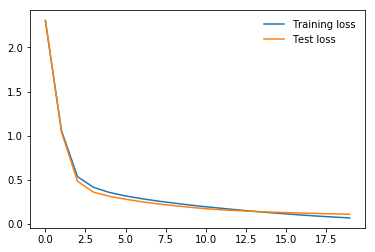

In [478]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Test loss')
plt.legend(frameon=False)

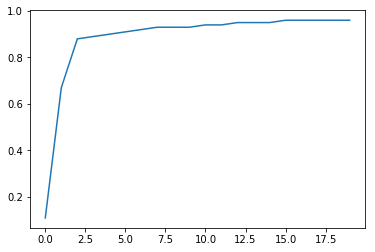

In [479]:
plt.plot(accuracies, label='Accuracies')

We've improved the accuracy from Logistic Regression model in over ~8\%!